# 第 1 章 概率思维

<style>p{text-indent:2em;2}</style>

```{tip}
 归根到底，概率论不过是把常识化作计算而已。                                ------皮埃尔---西蒙•拉普拉斯
```

本章将学习贝叶斯统计中的核心概念以及一些用于贝叶斯分析的基本工具。大部分内容都是理论介绍，其中会涉及一些 `Python` 代码，绝大多数概念会在本书其余章节中反复提到。尽管本章有点偏理论，可能会让你感到不安，但这会让你在后面应用贝叶斯统计方法解决问题时更轻松一些。

本章包含以下主题：

- 统计模型
- 概率及不确定性
- 贝叶斯理论与统计推断
- 单参数推断以及经典抛硬币问题
- 如何选择先验
- 如何沟通贝叶斯分析的结果

---

## 1.1 统计、模型与本书途径

统计学主要是收集、组织、分析并解释数据，因此，统计学基础知识对数据分析至关重要。数据分析主要使用两种统计方法：

- **探索性数据分析（ Exploratory Data Analysis ）** ：利用一些数据汇总信息辅助分析的统计方法，主要包括可视化图表、统计摘要两种手段。常见统计摘要信息有均值、众数、标准差等，此类信息也被称为描述性统计；常见可视化手段包括直方图、散点图等。

```{note} 
假设我们已经有了数据集，通常做法是先探索并可视化，进而能对数据有直观的认识。可通过两步完成探索式数据分析过程：描述性统计、数据可视化。其中：描述性统计指用一些指标或统计值来定量地总结或刻画数据，例如如何用均值、众数、标准差、四分位差等指标来描述数据。数据可视化用生动形象的方式表述数据，直方图、散点图等是常见表现形式。乍一看，探索式数据分析似乎是复杂分析前做的准备工作而不是真正的分析，但它却在理解、解释、检查、总结及交流贝叶斯分析结果过程中非常有用。
```

- **推断统计（ Inferential Statistics ）** ：指在当前数据之外做出陈述的统计方法。人们可能想要了解一些特定现象，或者想要对未来（尚未观测到的）数据点做出预测，或者需要对同一观测在几种相互矛盾的解释中做出决策。推断统计提供一套分丰富的方法和工具，帮助我们回答上述类型的问题。

```{note} 
有时画画图、对数据做些简单计算就够了。但另外一些时候，希望从数据中挖掘出更一般性的结论。例如：人们可能希望了解数据是怎么生成的，也可能想对未来还未观测到的数据做出预测，又或者是希望从多个对观测值的解释中找出最合理的一个，这些正是统计推断所做的事情。统计推断模型分许多种，但依赖的是概率模型，许多科学研究也都基于模型，大脑不过是对现实进行建模的一台机器。
```

本书的重点是：如何执行贝叶斯推断统计，然后使用探索性数据分析来总结、解释、检查和交换贝叶斯推断结果。

大多数统计学课程是作为“食谱集合”来讲授的。大致情形是这样：去 “统计” 食品屋，拿出并打开一个罐头，加些 “数据” 来品尝，搅拌直到你获得一致的 $p$ 值，最好在 `0.05` 以下。此类课程主要目标是教你如何挑选罐头，而我不喜欢这种方法。

本书采取了一种不同方法：同样还将学习一些食谱，但不是速食罐头，而是自制食品；我们将学习如何混合适合不同美食场景的新鲜食材，以便让你理解和应用超出本书示例的大量概念。

采取这种方法是可能的，有两个原因：

- **本体论层面：**
    统计学是在概率论数学框架下一种统一的建模形式。使用概率方法为不同方法提供了一个统一视图，统计方法和机器学习方法在概率视角下看起来更相似。
- **技术层面：**
    像  `PyMC3`  这样的现代软件，允许实践者以相对简单的方式定义和求解模型。而就在几年前，许多模型还无法求解，或需要非常高的数学和技术复杂度。

### （1）与数据共舞

数据是统计学和数据科学的重要组成部分。数据的主要来源包括：实验、计算机模拟、调查和实地观测等。如果我们是负责产生或收集数据的人，首先应当仔细考虑想要回答的问题和将使用的方法，然后才着手获取数据。事实上，有完整的统计学分支来应对数据收集工作，即所谓实验设计。在数据泛滥的时代，人们有时会忘记，收集数据并不总是便宜的。例如：虽然大型强子对撞机确实每天产生数百太字节，但它的建造需要多年体力和脑力劳动。

一般可以认为数据生成的过程是随机的，因为存在本体论、技术和/或认知上的不确定性。即系统本质上是随机的，存在噪声或者存在限制高精度测量的技术问题，和/或存在一些隐私限制。鉴于此，人们需要在模型的上下文对数据做出解释，包括心理模型和形式模型。**数据不会说话，而是通过模型说话。**

本书将假设已经收集了数据，而且数据干净整洁，以便将注意力集中在主题上。但需要强调，虽然本书没有介绍此方面的技能，但读者应当自行学习和练习，以便成功获取和使用数据。

分析数据时的一项非常有用的技能是懂得如何用编程语言（如 `Python`）编写代码。考虑到我们生活在一个数据混乱的世界，处理数据通常是必要的，而编程有助于完成该任务。即使您的数据非常干净整洁，编程仍然非常有用，因为现代贝叶斯统计主要是通过 `Python` 或 R 等编程语言完成。

如果想了解如何使用 `Python` 清洗和操作数据，推荐您阅读 `杰克·范德普拉斯` 的《 `Python 数据科学手册` 》。

### （2）贝叶斯建模

**模型是对给定系统或流程的简化描述**。这些描述被故意设计成只捕获系统中最相关的方面，而不是解释每个细节。这就是为什么更复杂模型并不总是更好的原因。存在许多不同类型的模型，本书中将仅介绍贝叶斯模型。可以使用三个步骤总结贝叶斯建模过程：

（1）设计模型：给定一些数据以及关于数据生成的假设，通过组合以概率分布为主要内容的模块来设计一个模型。模型是粗略近似的，但通常能够满足需要。

（2）拟合模型：利用贝叶斯理论将数据和模型结合起来，根据数据和假设推导出逻辑结论，人们称之为经数据拟合后的模型。

（3）诊断模型：根据多种标准（包括真实数据和领域专业知识），判断模型拟合得是否合理。

当然，你会发现实际建模过程并非严格按照该顺序进行，有时可能会跳到其中任何一步，原因可能是程序编写错误，也可能是有了新的改进模型，又或者是需要增加更多数据。

 贝叶斯模型是基于概率构建的，因此也称概率模型。为什么基于概率呢？因为概率能够很好地描述数据中的不确定性，并让我们在满是岔路的花园里不至于迷路。

## 1.2 概率论

本节不想总结概率论知识体系，只介绍几个对理解贝叶斯方法非常重要的一般性概念。在本书后面部分，将根据需要适度扩展或引入与概率相关的一些概念。要详细学习概率论，建议阅读专门的书籍。推荐 `约瑟夫·K·布利茨坦（Joseph K Blitzstein）` 和 `杰西卡·黄 （Jessica Hwang）` 写的《`Introduction to Probability`》。另一本是 `渡部住夫` 的《`Mathematical Theory of Bayesian Statistics`》，后者比前者更注重贝叶斯，数学方面也更重。

### 1.2.1 解释概率

虽然概率论是成熟且久负盛名的数学分支，但对概率的解释不止一种。**从贝叶斯角度看，概率是一种量化命题不确定性水平的度量**。根据该定义，询问火星上有生命的概率、电子质量为 $9.1 \times 10^{-31}$ 千克的概率或布宜诺斯艾利斯 1816 年 7 月 9 日为晴天的概率是完全有效和自然的。注意，火星上存在或不存在生命，原本是一个结果为 `是` 或 `否` 的二元问题。但考虑到不能完全确定这一事实，明智做法是找出火星上有生命的可能性有多大。

由于概率的贝叶斯定义与人类认知心理状态有关，所以也被称为概率的主观定义。但任何有科学头脑的人都不会仅仅用自己的想法来回答概率问题，而是会使用所有有关火星的地球物理数据、有关生命必备条件的生化知识等来推断出答案。因此，贝叶斯统计和人们拥有的任何其他成熟科学方法一样都既是主观又是客观的。

如果没有关于一个问题的任何信息，那么所有可能事件具有相同的可能性，这形式上等同于为每个可能的事件分配相同概率。在没有信息的情况下，不确定性是最大的。相反，如果知道某些事件更有可能发生，那么可以通过给其分配更高概率（或给其他事件分配更少的概率）来形式化表示。此外，用统计语言谈论事件时，通常并不局限于可能发生的事情，例如：小行星撞向地球或姑姑 60 岁的生日派对。事件是一个可以接受任何可能值（或值的集合）的变量，例如：30 岁以上的事件，或去年在世界各地售出的自行车数量。

```{note} 

参考概率论中有关样本空间、样本点和事件的定义。样本所有可能的值构成样本空间，其中每一个可能的值为样本点，若干样本点的集合构成事件。
```

概率的概念还与逻辑学有关。在亚里士多德或古典逻辑中，只有取值为真或假的语句。在概率贝叶斯定义下，确定性只是一个特例：真陈述的概率为 1，假陈述的概率为 0。只有在有确凿数据表明某些东西正在生长、繁殖和其他生物相关活动后，才会将火星生命概率定为 1。然而，将概率指定为 0 更难，因为几乎总是可以认为：由于实验或观测的问题，导致了得出火星上没有生命该可能错误的结论。

与此相关的是克伦威尔规则，该规则指出：应保留使用先验概率 0 或 1 来处理逻辑上正确或错误的陈述。有趣的是，`理查德·考克斯（Richard Cox）`在数学上证明，如果想要将逻辑扩展到包含不确定性，必须使用概率理论。贝叶斯定理只是概率规则的一个逻辑推论。因此，**贝叶斯统计的另一种思维方式是在处理不确定性时将其作为逻辑的延伸**，当然这与贬义意义上的 “主观推理” 无关。

综上所述，用概率来模拟不确定性并不一定与自然界是“确定性”还是“随机性”的争论有关，也不一定与主观个人信念有关。这是一种纯粹用来建模不确定性的方法论。我们认识到大多数现象很难理解，因为通常不得不处理不完整和（或）有噪声的数据，而本质上人类会受到大脑限制。因此，使用了一种明确考虑不确定性的建模方法。

### 1.2.2 定义概率

概率值介于 [0,1] 之间，其计算遵循一些法则，其中之一是乘法法则： 

```{math}
p(A, B)=p(A \mid B) p(B) \tag{式1.1} \label{式1.1}
```

上式的读法是：$A$ 和 $B$ 同时发生的概率等于 $B$ 发生的概率乘以在 $B$ 发生条件下 $A$ 也发生的概率。其中，$p(A,B)$ 表示 $A$ 和 $B$ 的联合概率，指 $A$ 和 $B$ 同时发生的概率； $p(A|B)$ 表示条件概率 ，指在知识（或证据、事件） $B$ 支持下，$A$ 发生的概率。二者的现实意义不同，例如：“路面是湿的” 与 “下雨时路面是湿的” 两个事件的概率截然不同，后者是典型的条件概率。

条件概率 $p(A|B)$ 可能比原概率 $p(A)$ 高，也可能低或者相等。从贝叶斯角度，条件概率可以做如下理解：

- 如果事件 $B$ 并不能提供任何关于事件 $A$ 的信息，那么 $p(A|B)=p(A)$ ，即暗示 $A$ 和 $B$ 是相互独立的。

- 如果事件 $B$ 能够给出有关事件 $A$ 的信息，那么根据信息不同，事件 $A$ 可能发生的概率会变得更高或更低。

以公平六边形骰子为例，如果我们掷骰子，得到数字 3 的可能性有多大？将是六分之一，因为六个数字中的每一个都有相同机会；假设已经知道点数是奇数，得到数字 3 的概率又是多少？是三分之一，因为唯一可能的奇数数字是 $\{1,3,5\}$ ，每个数字都有相同几率；如果知道出现的是偶数，得到数字 3 的可能性又是多少呢？是零，因为如果一旦知道数字是偶数，那么可能的数字就是 $\{2,4,6\}$ ，因此得到 3 是不可能的。

上例表明，通过观测数据的条件作用，可以有效地改变事件发生的概率，即事件的不确定性。条件概率是统计学的核心，不管你的问题是掷骰子还是制造自动驾驶汽车。

#### （1）概率分布

概率分布是一个数学对象，用来描述不同事件发生的可能性有多大。通常事件以某种方式被限制在一组可能的事件中，例如：骰子的 $\{1,2,3,4,5,6\}$ 。统计学中一个常见且有用的概念是：**数据是从某个具有未知参数的真实概率分布中生成的**。而**推理是从符合真实概率分布的样本中找出这些参数值的过程**。一般来说，我们无法获得真实的概率分布，因此必须想办法以某种方式创建一个具有近似分布的模型，而概率模型则是通过合理组合概率分布来建立的。

```{note}
请注意，一般来说不能确定一个模型是否正确，因此需要评估和批判模型，以便获得信心并说服他人相信模型适用于想要探索或解决的问题。
```

如果一个变量 $X$ 可以用概率分布来描述，即可以称之为随机变量 $X$ 。一般来说，使用大写字母（如 $X$） 来表示一个随机变量，使用大写字母粗体（如 $mathbb{X}$ ）来表示一个随机向量；并用小写 $x$ 表示该随机变量的一个实例（取值），使用小写粗体 $\mathbb{x}$ 表示随机向量的一个实例（取值）。此外，统计学中通常用大写的 $N$ 表示样本数量， 用小写的 $p$ 表示随机向量的维度。

让我们看一个使用 `Python` 的示例：真实概率分布是均值 $\mu=0$ 和方差 $\sigma=1$ 的正态（或高斯）分布；这两个参数完全明确地定义了正态分布。使用 SciPy，可以通过编写 `stats.Norm(μ，σ)` 来定义随机变量，并且使用 `rvs` （random variates 的缩写）方法生成一个实例 $x$ 。而下面示例中，代码要求提供三个值：

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az

az.style.use('arviz-darkgrid')

In [2]:
μ = 0.
σ = 1.
X = stats.norm(μ, σ)
x = X.rvs(3)

您会注意到，每次执行此代码（统计术语为：一次试验）时，将获得不同随机结果。同时还需注意，一旦知道了概率分布参数的值，则每个值的概率就是已知的，随机发生的是每次试验中获得的确切值。

```{tip}

关于随机的含义，一个常见误解是：可以从随机变量中得到任何可能的值，或认为所有值都是等可能的。
```

随机变量的可能值及其概率是由概率分布严格控制的，随机性只是因为人们无法预测在每次试验中将要得到的确切值。每次执行前面的代码，都会得到三个不同数字，但如果重复代码数千次，将能够经验性地检查 $\mu$ 的平均值是否在零附近，以及 95% 的样本值是否在 [-1.96，+1.96] 范围内。当然如果研究正态分布的数学性质，我们可以得出同样的结论。

统计学中表示变量随参数 $\mu,\sigma$ 呈正态分布的形式为：

```{math}
x \sim \mathcal{N}(\mu,\sigma) \tag{式1.2} \label{式1.2}
```

在本书中，当看到波浪号“ $\sim$ ”符号时，读为：$x$ 服从 ... 分布。

在许多文献中，常用方差而不是标准差来表示正态分布，记作 $\mathcal{N}(\mu,\sigma^2)$ 。本书中，我们将使用标准差来做正态分布的参数，首先是因为它更容易解释，其次是因为  `PyMC3`  是这样工作的。

在本书后面将遇到很多概率分布；每次出现一个概率分布，都会花一些时间来介绍它。首先从正态分布开始，因为它类似于概率分布中的宙斯。如果变量值由以下表达式规定，则变量服从高斯分布：

```{math}
p(x \mid \mu, \sigma)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}\tag{式1.3} \label{式1.3}
```

这是正态分布的概率密度函数。不需要记住公式 1.3，此处只想展示给大家看，这样就能知道数字是从哪里来的。正如已经提到的，$\mu$ 和 $\sigma$ 是该分布的参数，通过指定这些参数值，完全可以定义分布；可以从表达式 1.3 中看到这一点，因为其他项都是常量。$\mu$ 可以取任何实值，即 $\mu \in \mathbf{R}$ ，并指定分布的平均值 （以及中位数或众数）。$\sigma$ 是标准差，它只能是正数，表示概率分布的散布情况，值越大分布越分散。因为 $\mu$ 和 $\sigma$ 有无限多个可能组合，所以存在无限多个高斯分布的实例，并且所有实例都属于相同的高斯族。

数学公式简明扼要而且不存在二义性。但必须承认，第一次遇到它会让人害怕，特别是对数学不太感兴趣的人；打破僵局的一个好方法是使用 `Python` 来探索它们：

[]

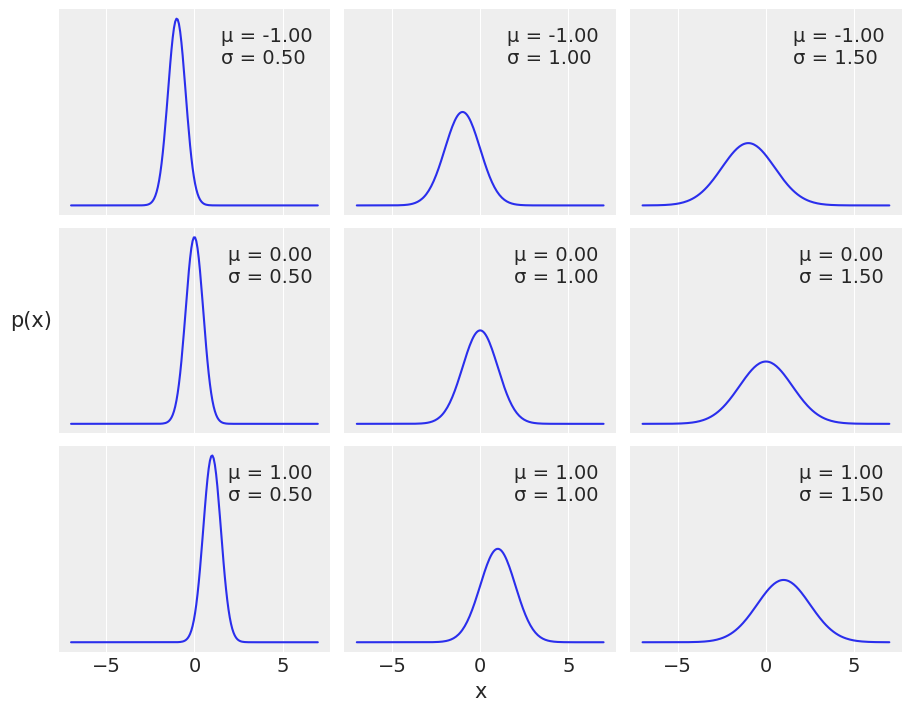

In [3]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 200)
_, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True,
                     sharey=True,
                     figsize=(9, 7), constrained_layout=True)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot([], label="μ = {:3.2f}\nσ = {:3.2f}".format(mu,
                     sd), alpha=0)
        ax[i,j].legend(loc=1)
ax[2,1].set_xlabel('x')
ax[1,0].set_ylabel('p(x)', rotation=0, labelpad=20)
ax[1,0].set_yticks([])

前面大部分代码用于绘图，概率部分由 `y=stats.norm(u，sd).pdf(X)` 执行。在给定一组 $x$ 值的 $µ$ 和 $sd$ 参数的情况下，通过这条线，可以评估正态分布的概率密度函数。前面的代码生成图 1.1。在每个子图中，我们有一条蓝色（深灰色）曲线，表示具有特定参数的高斯分布，并且包含在每个子图的图例中：

```{note}

本书中大多数数字都是直接从它们前面的代码生成的，很多时候甚至没有将代码与数字联系起来的前导短语。使用 Jupyter 笔记本或 Jupyter Lab 的人应该熟悉这种模式。
```

<center>

<img src="https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210430230432_cf.webp" style="zoom:67%;" />

图1.1 
</center>

随机变量有两种类型：连续型和离散型。连续变量可以取某个区间中的任何值（可以用 `Python` 的浮点数来表示），而离散变量只能取某些值（可以用 `Python` 的整数来表示）。正态分布是一种典型的连续变量分布。

请注意，前图中 `ytick` 被省略了；这是故意为之，而不是 `bug`。省略的原因是，这些值不会添加太多相关信息，但可能会让人感到困惑。解释一下：$y$ 轴上的实际数字其实并不重要，重要的是它们之间的相对值。如果从 $x$ 中取两个值，比方说 $x_i$ 和 $x_j$ ，并且有 $p(x_i)=2p(x_j)$ （在曲线图中高出两倍），你可以确切地说，$x_i$ 取值的概率是$x_j$ 概率的两倍。在处理连续分布时，最棘手的是 $y$ 轴上的值不是概率，而是概率密度。为得到一个合适的概率，你必须在给定区间内积分。也就是说，必须计算该区间曲线下方的面积。虽然概率不能大于 1，但概率密度可以，不过概率密度曲线下的总面积限制为 1。从数学角度理解概率和概率密度之间的差异是至关重要的。

#### （2）独立同分布变量

许多模型假设不同随机变量的值来自于同一分布中的抽样，但这些随机变量的取值之间彼此独立。此情况通常其为独立同分布（简称iid）变量。 相互独立在数学记数法上可表示为 $p(x,y)=p(x)p(y)$ ，即对于 $x$ 和 $y$ 的每个值，两个变量是独立的。

非iid变量的常见案例是时间序列，其中随机变量间的时间依赖性是需要考虑的关键特征。例如，以下数据来自 http://cdiac.esd.ornl.gov 。该数据记录了从1959年到1997年的大气二氧化碳水平。加载数据并绘制它得到：

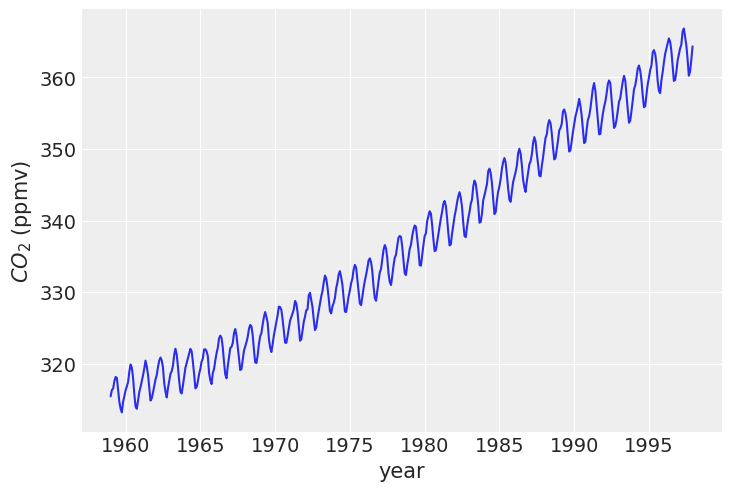

In [4]:
data = np.genfromtxt('../data/mauna_loa_CO2.csv', delimiter=',')
plt.plot(data[:,0], data[:,1])
plt.xlabel('year')
plt.ylabel('$CO_2$ (ppmv)')
plt.savefig('B11197_01_02.png', dpi=300)

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/bayesian_stat_20210524144726a0.webp)

图 1.2
</center>

图中每个数据点为一个变量，对应当月测得的大气二氧化碳水平，可以很容易看出每个月的测量数据之间并不独立，数据点之间存在时间依赖性。事实上，图中呈现有两种趋势：一是季节性趋势(与植被的生长和衰退周期有关)，另一种是全球趋势，表明大气中的二氧化碳浓度越来越高。

#### （3）贝叶斯定理

到目前为止，我们已经学习了一些统计学中的基本概念和词汇，接下来看看神奇的贝叶斯定理：

```{math}
p(\theta \mid y)=\frac{p(y \mid \theta) p(\theta)}{p(y)}\tag{式1.4} \label{式1.4}
```

看起来稀松平常，跟小学课本里的公式差不多，不过这就是关于贝叶斯统计的全部。首先看看贝叶斯定理是怎么来的。

根据前面提到的概率论中的乘法准则，有以下式子：

```{math}
p(\theta, y)=p(\theta \mid y) p(y)\tag{式1.5} \label{式1.5}
```

也可以写为：

```{math}
p(\theta, y)=p(y \mid \theta) p(\theta)\tag{式1.6} \label{式1.6}
```

由于以上式子的左边相等，于是可以得到：

```{math}
p ( \theta | y ) p ( y ) = p ( y | \theta ) p ( \theta )\tag{式1.7} \label{式1.7}
```

对上式调整下顺序，便得到了公式 1.4 的贝叶斯定理。

现在，看看该式的含义及重要性。首先，上式表明 $p(\theta|y)$ 和 $p(y|\theta)$ 不一定相等，日常分析中即使系统学习过统计学和概率论的人也很容易忽略这点。举个简单例子来说明为什么二者不一定相等：“有两条腿的动物就是人” 的概率和 “人有两条腿” 的概率显然不同。几乎所有人都有两条腿，但是有两条腿的动物很多不是人类，比如鸟类。

在贝叶斯定理中，如果将 $\theta$ 理解为**假设**，将 $y$ 理解为**数据**，那么贝叶斯定理告诉我们的就是，在给定数据的条件下如何计算假设成立的概率。那么如何把假设融入贝叶斯定理中去呢？答案是概率分布。换句话说，此处假设是一种狭义上的假设，我们所做的实际上是寻找模型的参数（更准确地说是参数的分布）。

贝叶斯定理是贝叶斯统计的核心，正如我们将在第二章中看到的那样，使用  `PyMC3`  等工具进行概率编程使我们不必在每次构建贝叶斯模型时显式编写贝叶斯定理。尽管如此，知道各部分名称还是很重要得，因为我们将不断引用它们，理解每个部分的含义也很重要，因为这将帮助我们概念化模型，所以定义：

- $p(\theta)$：先验分布，简称（Prior）；
- $p(y|\theta)$ ：似然（Likelihood）；
- $p(\theta|y)$：后验分布，简称（Posterior）；
- $p(y)$：证据或边缘似然（Marginal likelihood）。

先验分布反映的是在观测到数据之前我们对参数的了解，如果对参数一无所知，可以用一个不包含太多信息的分布（如均匀分布）来表示。由于引入了先验，有些人会认为贝叶斯统计是偏主观的，但实际上先验不过是构建模型时得一些假设罢了，其主观性跟似然差不多。

似然是指如何在实验分析中引入观测数据，**反映的是在给定参数下得到某组观测数据的可信度**。

后验分布是贝叶斯分析的结果，**反映的是在给定数据和模型条件下我们对问题的全部认知。**需要注意，后验指的是模型中参数的概率分布而不是单个值，该分布正比于先验乘以似然。

曾经有这么个笑话：**贝叶斯学派就像是这样一类人，心里隐约期待着一匹马，偶然间瞥见了一头驴，结果坚信他看到的是一头骡子**。当然，如果要刻意纠正该笑话的话，在先验和似然都比较含糊的情况下，我们会得到一个（模糊的）“骡子”的后验。不过，该笑话也讲出了一个道理：后验其实是对先验和似然的某种折中。

从概念上讲，**后验可以看做是在观测到数据之后对先验的更新**。事实上，某一次分析的后验，在收集到新数据之后，也可以视为下一次分析中的先验。这使得贝叶斯分析特别适合于序列化数据分析，比如：通过实时处理来自气象站和卫星的数据提前预警灾害，感兴趣的读者可以阅读 “在线机器学习” 方面的算法。

最后一个概念是证据，也称作边缘似然。证据是在模型参数取遍所有可能值的条件下得到指定观测值的概率平均。不过，本书大部分内容不关心该概念，可以简单地视其为归一化系数。我们更关心参数的相对值而非绝对值。把证据这一项忽略掉之后，贝叶斯定理可以表示成如下正比形式：

```{math}
p(\theta \mid y) \propto p(y \mid \theta) p(\theta) \tag{式1.8} \label{式1.8}
```

理解其中每个概念可能需要时间和更多例子，本书也将围绕这些内容展开。

## 1.3 以单参数的贝叶斯推断为例

前面学习了几个重要概念，其中有两个是贝叶斯统计的核心概念，在此再重新强调下：

1. **概率是用来衡量我们对参数的不确定性的。** 
2. **贝叶斯定理是根据新数据正确更新这些概率的机制，有望减少不确定性。**

接下来从简单例子入手，通过推断单个未知参数来学习如何进行贝叶斯统计。

### （1）抛硬币问题

抛硬币是统计学中的经典问题，其描述如下：随机抛一枚硬币，重复一定次数，记录正面朝上和反面朝上的次数，根据数据回答诸如这枚硬币是否公平，以及更进一步这枚硬币有多不公平等问题。抛硬币是学习贝叶斯统计非常好的例子，一方面是因为几乎人人都熟悉抛硬币的过程，另一方面是因为该模型很简单，可以很容易计算并解决该问题。此外，许多真实问题都包含两个互斥的结果，例如 0 或 1、正或负、奇数或偶数、垃圾邮件或正常邮件、安全或不安全、健康或不健康等。因此，尽管我们讨论的是硬币，该模型也同样适用于前面这些问题。

为了用贝叶斯学派理论估计硬币的偏差，需要数据和一个概率模型。对于抛硬币问题，假设已试验了一定次数并且记录了正面朝上的次数，也就是说数据部分已具备，剩下就是模型部分了。考虑到这是第一个模型，我们会列出所有必要的数学公式，并且一步一步推导。下一章中，我们会重新回顾该问题，并借用  `PyMC3`  从数值上解决它（也就是说那部分不需要手动推导，而是利用  `PyMC3`  和计算机来完成）。

### （2）通用模型

首先抽象出一个概念：“偏差”。我们称，如果一枚硬币总是正面朝上，那么其偏差 1，反之，如果总是反面朝上，那么其偏差是 0，如果正面朝上和反面朝上的次数各占一半，那么其偏差是 0.5。这里用参数 $θ$ 来表示偏差，用 $y$ 表示 $N$ 次抛硬币实验中正面朝上的次数。根据贝叶斯定理，需要指定先验 $p(\theta)$ 和似然 $p(y|\theta)$ 分别是什么。先从似然开始。

### （3）选择似然

假设多次抛硬币的结果之间相互没有影响，也就是说每次抛硬币都是独立的实验，同时假设结果只有两种可能：正面朝上或反面朝上。基于该假设可以看出，二项分布是不错的似然候选： 

```{math}
p(y \mid \theta, N)=\frac{N !}{y !(N-y) !} \theta^{y}(1-\theta)^{N-y} \tag{式1.9} \label{式1.9}
```

二项分布是一个离散分布，表示给定某个参数值 $\theta$ ， $N$ 次抛硬币实验中 $y$ 次正面朝上的概率（或者更通俗地描述是，$N$ 次实验中，$y$ 次成功的概率）。

In [5]:
n_params = [1, 2, 4]  # Number of trials
p_params = [0.25, 0.5, 0.75]  # Probability of success
x = np.arange(0, max(n_params)+1)
f,ax = plt.subplots(len(n_params), len(p_params), sharex=True,
                    sharey=True,
                    figsize=(8, 7), constrained_layout=True)
for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]
        y = stats.binom(n=n, p=p).pmf(x)
        ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ =
                           {:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend()
        ax[2,1].set_xlabel('y')
        ax[1,0].set_ylabel('p(y | θ, N)')
        ax[0,0].set_xticks(x)

SyntaxError: EOL while scanning string literal (3636673657.py, line 14)

<center>

<img src="https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505153120_1a.webp" style="zoom:67%;" />

图1.2 
</center>

二项分布是似然的一个合理选择，直观上看，$θ$ 可以看作抛一次硬币时正面朝上的可能性，并且该过程发生了 $y$ 次。类似地，可以把 $1−θ$ 看作抛一次硬币时反面朝上的概率，并且该过程发生了 $N−y$ 次。

假如知道了 $θ$，就可以从二项分布得出硬币正面朝上的分布。如果不知道 $θ$ 也别灰心，在贝叶斯统计中，当不知道某个参数的时候，就对其赋予一个先验。

### （4）选择先验

此处选用贝叶斯统计中最常见的贝塔分布作为先验，其数学形式如下：

```{math}
p(\theta)=\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} \theta^{\alpha-1}(1-\theta)^{\beta-1} \tag{式1.10} \label{式1.10}
```

仔细观察上式可看出，除 $\Gamma$ 部分之外，贝塔分布和二项分布看起来很像。 $\Gamma$ 表示伽马函数。现在只需知道，用分数表示的第一项是一个标准化常量，用来保证该分布的积分为 1，此外，$\alpha$ 和 $\beta$ 两个参数用来控制分布形态。贝塔分布是到目前为止的第 3 个分布，利用下面的代码，可以深入了解其形态：

In [ ]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True,
                     sharey=True,
                     figsize=(8, 7), constrained_layout=True)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a,
                     b), alpha=0)
        ax[i,j].legend()
        
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, 0.05, 'θ', ha='center')
f.text(0.07, 0.5, 'p(θ)', va='center', rotation=0)

<center>

<img src="https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505153642_8f.webp" style="zoom:67%;" />

图1.3
</center>


为什么要在模型中使用贝塔分布呢？原因之一是：贝塔分布的范围限制在 0 到 1 之间，跟我们的参数一样；另一原因是其通用性，从前图可看出，该分布有多种形状，包括均匀分布、类高斯分布、U 型分布等。第三个原因是：贝塔分布是二项分布的共轭先验。对于贝叶斯定理，似然的共轭先验是指：将该先验与似然组合在一起后，得到的后验与先验分布的表达形式是一样的。简单说，就是用贝塔分布作为先验、二项分布作为似然时，我们会得到一个贝塔分布形式的后验。

除贝塔分布之外还有许多其他共轭先验，例如：高斯分布的共轭先验就是高斯分布。共轭确保了后验的数学可处理性，这一点非常重要，因为贝叶斯统计学中常见的问题是很难或无法解析地计算得到后验分布。在MCMC、变分法等现代后验计算方法出现之前，共轭先验是贝叶斯统计的一项重大突破。不过从第二章概率编程开始，将主要介绍如何使用现代计算方法来解决贝叶斯问题。

```{note}
有关共轭先验的知识，参见相关文献。共轭先验是 MCMC、变分等数值推断方法出现前，解决后验概率推断问题的主要方法。
```

### （5）计算后验

首先回忆贝叶斯定理：后验正比于似然乘以先验。对于抛硬币问题，须将二项分布和贝塔分布相乘：

```{math}
p(\theta \mid y) \propto \frac{N !}{y !(N-y) !} \theta^{y}(1-\theta)^{N-y} \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha) \Gamma(\beta)} \theta^{\alpha-1}(1-\theta)^{\beta-1}\tag{式1.11} \label{式1.11}
```

可以简化该表达式。为了实际考虑，可以去掉所有不依赖的元素，结果仍然有效。相应地，可以写为：

```{math}
p(\theta \mid y) \propto \theta^{y}(1-\theta)^{N-y} \theta^{\alpha-1}(1-\theta)^{\beta-1}\tag{式1.12} \label{式1.12}
```
重新整理之后得到：

```{math}
p(\theta \mid y) \propto \theta^{y+\alpha-1}(1-\theta)^{N-y+\beta-1}\tag{式1.13} \label{式1.13}
```

如果注意会发现，上述表达式与贝塔分布具有相同的函数形式（除了归一化项），其中参数 $\alpha_{\text {posterior }}=\alpha_{\text {prior }}+y$  ， 参数 $\beta_{\text {posterior}}=\beta_{\text {prior }}+N-y$ 。事实上，问题的后验分布依然是贝塔分布：

```{math}
p(\theta \mid y) \propto \operatorname{Beta}\left(\alpha_{\text {prior }}+y, \beta_{\text {prior }}+N-y\right)\tag{式1.14} \label{式1.14}
```

### （6）后验诊断

现在有了后验表达式，可以用 `Python` 对其计算并画出结果。下面代码中，其实只有一行是用来计算后验结果的，其余代码都是用来画图的：

In [ ]:
plt.figure(figsize=(10, 8))
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35
beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 200)
for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)
    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505154649_0f.webp)

图1.4
</center>

在图 1.4 第一行中，实验次数为 0，因此第一个图中的曲线描绘的是先验分布，其中有 3 条曲线，每条曲线分别表示一种先验。

- 蓝色的线是一个均匀分布先验，其含义是：偏差的所有可能取值是等概率的。
- 红色的线与均匀分布有点类似，其含义是：偏差等于 0 或者 1 的概率要比其他值更大一些。
- 绿色的线集中在中间值 0.5 附近，其含义是：硬币正面朝上和反面朝上的概率大致差不多。

剩余子图描绘了后续实验的后验分布，回想一下，后验可看做在给定数据之后更新了的先验。实验次数和正面朝上的次数分别标注在每个子图中。此外每个子图中在横轴 0.35 附近还有一个黑色的竖线，表示的是真实 $θ$ 。当然在真实情况下，我们并不知道该值，在此标识出来只是为了方便理解。从这幅图中可以学到很多贝叶斯分析方面的知识：

1. 贝叶斯分析的结果是后验分布而不是某个值，该分布描述了根据给定数据和模型得到的不同数值的可能性。
2. 后验最可能的值是根据后验分布的形态决定的，也就是后验分布的峰值。
3. 后验分布的分散程度与我们对参数的不确定性相关；分布越分散，说明不确定性越大。尽管 1/2 = 4/8 = 0.5，但由图可知，前者不确定性要大于后者。因为我们有了更多数据来支撑推断，该直觉也同时反映在后验分布上。
4. 在给定足够多数据时，两个或多个不同先验的贝叶斯模型会趋近于收敛到相同的后验结果。极限情况下，如果有无限多数据，不论使用什么样的先验，最终都会得到相同后验。注意：此处无限多是指某种程度而非某个具体数量，也就是说，从实际使用角度，某些情况下无限多数据可以通过比较少量的数据近似。
5. 不同后验收敛到相同分布的速度取决于数据和模型。从图中可看出，蓝色和红色的后验在经过 8 次实验后就很难看出区别了，而红色曲线则一直到 150 次实验之后才与另外两个后验看起来比较接近。
6. 有一点从图中不太容易看出来：如果一步一步地更新后验，最后得到的结果跟一次性计算得到的结果是一样的。换句话说，可以对后验分 150 次计算，每次增加一个新的观测数据并将得到的后验作为下一次计算的先验，也可以在得到 150 次抛硬币的结果之后一次性计算出后验，而这两种计算方式得到的结果完全一样。该特点非常有意义，当我们获得新数据时，这会导致我们以一种自然的方式更新估计，这种情况在许多数据分析问题中都很常见。

### （7）先验的影响以及选择

从前例可清楚地看出，先验可以影响推断。贝叶斯分析的新手或批评者通常对如何选择先验感到不适，因为他们不想让先验充当一个不让数据说话的审查员！这样的想法没有错，但必须记住，数据并不能真正说话，只有在模型（包括数学模型和心理模型）的上下文中，数据才有意义。在科学史上，同样的数据导致人们对相同主题有不同思考的例子很多，即使你的观点建立在正式模型上，这种情况也可能发生。

有些人青睐于使用没有信息量的先验（也称作均匀的、含糊的或者发散的先验）。此类先验对分析过程的影响最小。本书将遵循 Gelman、McElreath 和 Kruschke 三人的建议，倾向于使用带有较弱信息量的先验。在许多问题中，我们对参数可取的值一般都会有些了解（比如，参数只能是正数，或者知道参数近似的取值范围，又或是希望该值接近 0 或大于/小于某值）。此情况下，可以给模型加入一些微弱的先验信息而不必担心该先验会掩盖数据本身的信息。由于此类先验会让后验近似位于某一合理边界内，因此也被称作**正则化先验**。

当然，使用带有较多信息量的强先验也是可以的。根据问题不同，有可能很容易或者很难找到此类先验。例如在作者工作的领域（结构生物信息学）中，人们会尽可能地利用先验信息，通过贝叶斯或者非贝叶斯方式来了解和预测蛋白质的结构。如此做是合理的，因为我们是在数十年间从上千次精心设计的实验中收集的数据，因而有大量可供使用的可信先验信息。如果你有可信的先验信息，没有理由不去使用。试想下，如果汽车工程师每次设计新车时，都要重新发明内燃机、轮子乃至整个汽车，显然不是正确的打开方式。


现在知道了先验有许多种，但缓解不了我们选择先验时的焦虑。或许，最好是没有先验，这样事情就简单了。但不论是否基于贝叶斯，模型都在某种程度上拥有先验，即使先验并没有明确表示出来。事实上，许多频率统计学方面的结果可以看做是贝叶斯模型在一定条件下的特例（常见如均匀先验）。仔细看看前面那幅图，可以看到蓝色后验分布的峰值与频率学派分析中 $θ$ 的期望值是一致的（此处暗示最大后验估计和最大似然估计在某种先验假设下，得到等价的结果）：

```{math}
\hat \theta = \frac { y } { N }\tag{式1.15} \label{式1.15}
```

注意，此处 $\hat \theta$是点估计而非后验分布。由此看出，很难完全避免先验，但明确在分析中引入先验，会得到概率分布而不只是最可能的单个值。

明确引入先验的另一个好处是，我们会得到更透明的模型（此处可理解为可解释性）。这意味着更容易评判、调试以及优化。构建模型是一个循序渐进的过程，有时可能只需几分钟，有时候则需要数年；有时候整个过程可能只有你自己参与，有时候则可能包含你不认识的人。而且模型的可复现性很重要，而模型中透明的假设能有助于复现。

在特定分析任务中，如果对某个先验或者似然不确定，可以自由使用多个先验或者似然进行尝试。模型构建过程中的一个环节就是质疑假设，而先验就是被质疑的对象之一。不同的假设会得到不同的模型，根据数据和专业领域知识，可以对多个模型进行比较以期得到相对最好的模型，本书第 5 章模型比较部分会深入讨论该内容。

先验是贝叶斯统计中的核心内容之一，如果在这里你感到疑惑，也不用太担心，因为在后面遇到新问题时，我们还会反复讨论它。而且要知道人们在该问题上已经困惑了数十年并且相关的讨论一直在继续。


## 1.4 贝叶斯分析方法的沟通交流

创建摘要和交流结果是统计和数据科学实践的核心。本节将简要讨论使用贝叶斯模型时的一些特点。在接下来章节中，我们将继续看有关这一重要问题的例子。

### 1.4.1 模型的概念表示和图形化表示

**（1）概念表示**

根据受众不同，你可能在交流分析结果同时还需要交流模型。以下是一种简单表示概率模型的常见方式：

\begin{align*}
\theta &\sim \operatorname{Beta}(\alpha, \beta) \notag \\
y &\sim \operatorname{Bin}(n=1, p=\theta) \tag{式1.16} \label{式1.16}
\end{align*}


这是抛硬币例子用到的模型。符号 `～` 表示左边随机变量服从右边的分布形式，也就是说，这里 $θ$ 服从于参数为 $α$ 和 $β$ 的贝塔分布，而 $y$ 服从于参数为 $n=1$ 和 $p=θ$ 的二项分布。

**（2）图形化表示**

该模型还可以表示成 Kruschke 图的形式：

<center>

<img src="https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505155942_31.webp" style="zoom:67%;" />

图1.5 
</center>

图中第一层为先验，中间层为似然，第三层为数据。该图可以反映数据生成的过程：首先根据第一层的先验生成中间层的 $θ$ 和似然，然后根据 $θ$ 和似然生成第三层的数据 $y$ 。图中箭头表示变量间的依赖关系，符号 `～` 表示变量的随机性。本书中所有 Kruschke 图都是使用 Rasmus Bååth 提供的[模板](http://www.sumsar.net/blog/2013/10/diy-kruschke-style-diagrams/)制作的。

### 1.4.2 总结后验

贝叶斯分析的结果是后验分布，它包含了在给定数据和模型时有关参数的所有信息。从最基础的角度看，将最终的后验分布展示给观众似乎就已经可以了，但通常会同时给出后验分布的一些统计量。例如：给出后验的均值（或者众数、中位数）以让大家了解后验分布的中心位置、或给出标准差以让大家对后验的离散程度和不确定性有大致了解。

**（1）最高后验密度**

不过用标准差衡量类似正态分布的后验比较合适，但对一些其他类型的分布（如偏态分布）可能会得出误导性结论，因此，还可以采用 `最高后验密度（Highest Posterior Density，HPD）区间` 做衡量。

一个 HPD 区间是指包含一定比例概率密度的最小区间，常见的比例包括 `95% HPD` 或 `50% HPD` 等。如果说某个分析的 `95% HPD 区间` 是 [2,5]，其含义一般是指：根据模型和数据，模型参数位于 2～5 的概率是 0.95。

```{note}
这是一个非常直观的解释，以至于人们经常会将频率学派中的置信区间与贝叶斯方法中的可信区间弄混淆。如果你对频率学派比较熟悉，请注意这两种区间的区别。贝叶斯学派告诉我们的是 “参数取值区间的概率” ，这在频率学派的框架中是不可能的，因为频率学派中的参数是确切值，频率学派的置信区间只包含参数的确切取值。在继续深入前需要注意：选择 `95%` 还是 `50%` 作为 `HPD区间` 的概率密度比例没有什么特殊的地方，只不过是经常使用或约定俗成的值罢了。 其实完全可以选用比例为 `91.37%` 的 `HPD区间`。如果你选的是 `95%` 也完全没问题，究竟选择多大比例需要具体问题具体分析。
```

`ArviZ` 是一个 `Python` 包，用于贝叶斯模型的探索性数据分析。`ArviZ` 有许多函数可以帮助我们总结后验结果，例如，az.plot_posterior 可以用来生成具有分布平均值和 HPD 的曲线图。在下例中，我们从贝塔分布生成随机样本，而不是真实分析的后验结果。注意图中摘要的 `HPD区间` 为 `94%` 。`ArviZ` 每次计算和报告 HPD 时，默认情况下使用 0.94（对应于 `94% HPD区间` )。可通过向 trusted_interval 参数传递值来更改此设置。

In [ ]:
np.random.seed(1)
az.plot_posterior({'θ':stats.beta.rvs(5, 11, size=1000)})

<center>

<img src="https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505160529_37.webp" style="zoom:67%;" />

图1.6
</center>

## 1.5 后验预测检验

获取特定模型的后验分布后，可以用来模拟生成基于该分布的新数据。这有助于评估模型是否提供了有效预测，以对未来事件进行推断。这些模拟可用于多种目的，其中之一就是：通过对比观测数据和模拟数据的核密度估计值，来检验模拟数据是否类似于观测数据。在评估模型是否与数据生成机制有较好拟合时，需要更正式的后验预测检验方法。任何依赖于参数的统计或差异都可用于后验预测检验。这与先验预测检验的使用方式类似，但在对比观测数据和模拟数据时要更加严苛。

### （1） 后验预测性分布

贝叶斯方法的一个优势是：一旦得到了后验分布 $p(\theta|y)$ ，就可根据该后验生成未来的数据 $\hat y$ ，即用来做预测。而后验预测性分布是条件预测相对于后验分布的平均值。

```{math}
p(\hat{y} \mid y)=\int p(\hat{y} \mid \theta) p(\theta \mid y) d \theta \tag{式1.17} \label{式1.17}
```

从概念和计算上，我们将此积分 1.17 近似为迭代的两步过程：

- 第一步，从后验 $p(\theta|y)$  取样 $\theta$ 值；
- 第二步，将 $\theta$ 值馈给似然，获得一个数据点 $\hat y$ 。

请注意该过程如何组合两个不确定性来源：参数不确定性（由后验捕获）；以及采样不确定性（由似然捕获）。

### （2）后验预测检验

当需要进行预测时，可以根据上面两个过程获得预测。当然，也可以用其来比较观测数据和预测数据，进而对模型做出评判，以找出两组数据间的差异，此即为后验预测检验，检验的主要目标是两者的一致性。

生成数据和观测数据应该看起来差不多，否则有可能是建模出了问题或者输入数据到模型时出了问题。不过就算没有出错，两个集合仍然可能出现不同。尝试去理解其中的偏差有助于改进模型，或者至少能知道模型的极限。

即使不知道如何改进模型，能够理解模型或数据捕获（或未捕获）的问题也非常有价值。模型也许能够捕获到均值但无法预测异常值，这或许是个问题，但当我们只关心均值时，模型还是可用的。

换句话说，通常贝叶斯统计分析的总体目标不是宣布某个模型是错误的，而是想了解模型哪一部分是可信任的，并尝试检验该模型是否适合特定目的。一个人对一个模型有多大信心，在不同学科间肯定不一样。物理学可以使用高级理论在高度受控条件下研究系统，因此模型通常被视为对现实的很好描述；而其他学科研究复杂的、难以孤立的系统时，模型常具有较弱认识论地位。尽管如此，无论从事哪个学科，都应始终对模型做检验，后验预测性检查和探索性数据分析的想法是检验模型的好方法。

## 1.6 总结

我们的贝叶斯之旅首先围绕统计建模、概率论和贝叶斯定理做了一些简短讨论，然后用抛硬币的例子介绍了贝叶斯建模和数据分析，借用该经典例子传达了贝叶斯统计中的一些重要思想，比如用概率分布构建模型并用概率分布表示不确定性。此外我们尝试揭示了如何选择先验，并将其与数据分析中的一些其他问题置于同等地位（怎么选择似然，为什么要解决该问题等）。本章最后讨论了如何解释和报告贝叶斯分析的结果。我们对贝叶斯分析的一些主要方面做了简要总结，后面还会重新回顾这些内容，从而充分理解和吸收，并为后面理解更高级的内容打下基础。

下图以渡边住友的工作流程为基础，总结本章所述的贝叶斯工作流程：

<center>

<img src="https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505163234_92.webp" style="zoom:67%;" />

图1.7
</center>

我们假设存在一个总体未知的真分布，从该分布中可以通过实验、调查、观察或模拟获得有限样本。为了从真分布中学到一些东西，假设我们只观察到一个样本，建立了一个概率模型。概率模型由两个部分组成：先验和似然。我们使用模型和样本进行贝叶斯推断，得到一个后验分布；该分布封装了给定模型和数据的所有关于问题的信息。从贝叶斯的角度来看，后验分布是主要感兴趣的对象，其他一切都是从它衍生出来的，包括后验预测分布形式的预测。由于后验分布（以及由此得出的任何其他量）是模型和数据的结果，因此贝叶斯推断的有用性受到模型和数据质量的限制。评估模型的一种方法是将后验预测分布与之前获得的有限样本进行比较。请注意，后验分布是模型中参数的分布（以观测样本为条件），而后验预测分布是预测样本的分布（在后验分布上平均）。模型验证过程至关重要，不是因为想要确保拥有正确模型，而是因为我们知道几乎从来没有正确的模型。我们检查模型以评估它们在特定上下文中是否足够有用，如果不是，则深入了解如何改进它们。

在本章中，我们简要总结了进行贝叶斯数据分析的主要方面。在本书的其余部分，我们将重新审视这些想法，以便真正吸收它们，并将它们用作更高级概念的脚手架。在下一章中，我们将介绍  `PyMC3` ，这是一个用于贝叶斯建模和概率机器学习的 `Python` 库，以及 `ArviZ`，它是一个用于贝叶斯模型探索性分析的 `Python` 库。

## 1.7 习题

我们尚不清楚大脑是如何运作的，是按照贝叶斯方式？还是类似贝叶斯的某种方式？又或许是进化过程中形成的某种启发式的方式？不管如何，我们至少知道自己是通过数据、例子和练习来学习的，尽管你可能对此有不同的意见，不过我仍然强烈建议你完成以下练习。

<center>

![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505165349_d4.webp)
![](https://gitee.com/XiShanSnow/imagebed/raw/master/images/articles/spatialPresent_20210505165408_07.webp)

</center>